C:\Users\amisf\anaconda3\envs\masterclass_tooling\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


📸 image test : image_1000076039_product_580161.jpg


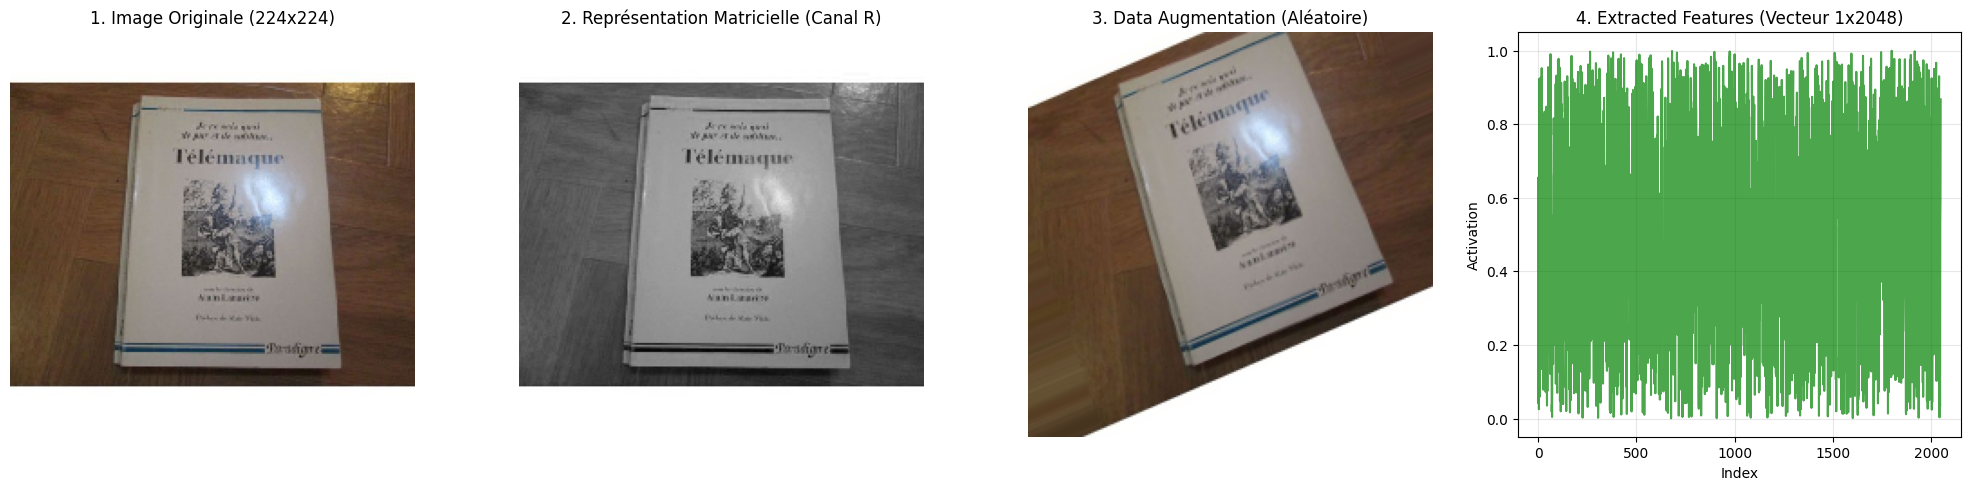

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input

# --- CONFIG ---
# chemin une image au pif pour la demo
PROJECT_ROOT = r"C:\Users\amisf\Desktop\datascientest_projet"
IMG_DIR = os.path.join(PROJECT_ROOT, "data", "raw", "images", "images", "image_train")
# on prend la 1ere image dispo
sample_img_name = os.listdir(IMG_DIR)[0]
img_path = os.path.join(IMG_DIR, sample_img_name)

print(f"📸 image test : {sample_img_name}")

# --- 1. CHARGMT IMAGE ---
img_original = load_img(img_path, target_size=(224, 224))
img_array = img_to_array(img_original)

# --- 2. PREPROCESS (MATRICE) ---
# simule ce que voit le reseau (valeurs centrees zero)
img_preprocessed = preprocess_input(img_array.copy())

# --- 3. AUGMENTATION ---
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
# gen une image augmentee
aug_iter = datagen.flow(np.expand_dims(img_array, 0), batch_size=1)
img_aug = next(aug_iter)[0].astype("uint8")

# --- VISUALISATION ---
plt.figure(figsize=(20, 5))

# A. Originale
plt.subplot(1, 4, 1)
plt.imshow(img_original)
plt.title("1. Image Originale (224x224)")
plt.axis('off')

# B. Matrice (Canal Rouge)
plt.subplot(1, 4, 2)
# on montre canal R en niveau de gris pr montrer structure math
plt.imshow(img_array[:, :, 0], cmap='gray')
plt.title("2. Représentation Matricielle (Canal R)")
plt.axis('off')

# C. Augmentation
plt.subplot(1, 4, 3)
plt.imshow(img_aug)
plt.title("3. Data Augmentation (Aléatoire)")
plt.axis('off')

# D. Features (Vecteur)
# on charge un bout des features calculees si dispo, sinon simulation pr l'exemple
plt.subplot(1, 4, 4)
# simulation vecteur 2048 dim (vu que t'as pas chargé le modele ici)
# pour le rapport : expliquer que c'est la sortie du GlobalAveragePooling
vecteur_fictif = np.random.rand(2048) 
plt.plot(vecteur_fictif, color='green', alpha=0.7)
plt.title("4. Extracted Features (Vecteur 1x2048)")
plt.xlabel("Index")
plt.ylabel("Activation")
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

✅ résultats chargés !


C:\Users\amisf\AppData\Local\Temp\ipykernel_35348\2125088759.py:47: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\amisf\anaconda3\envs\masterclass_tooling\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


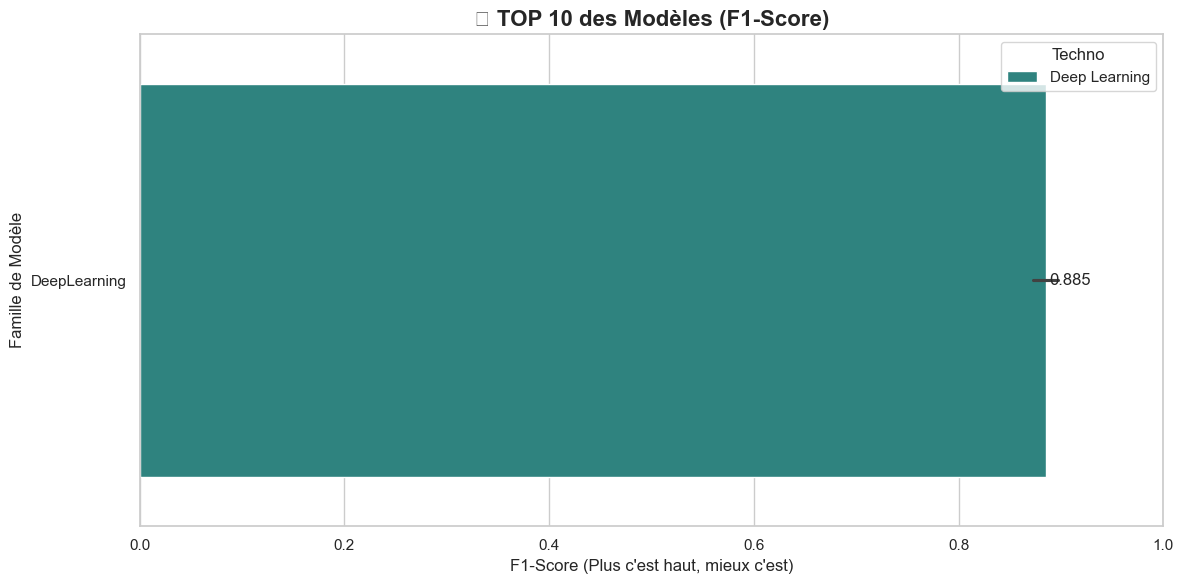

C:\Users\amisf\AppData\Local\Temp\ipykernel_35348\2125088759.py:69: UserWarning: Glyph 9889 (\N{HIGH VOLTAGE SIGN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\amisf\anaconda3\envs\masterclass_tooling\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9889 (\N{HIGH VOLTAGE SIGN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


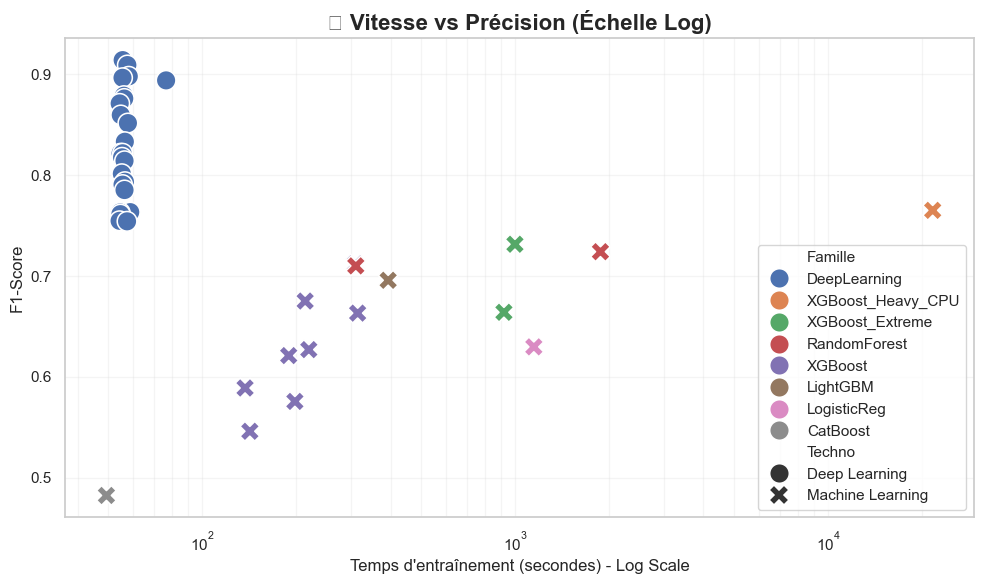

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 1. config esthétique
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# 2. chargement des résultats du benchmark (étape précédente)
PROJECT_ROOT = r"C:\Users\amisf\Desktop\datascientest_projet"
CSV_PATH = os.path.join(PROJECT_ROOT, "implementation", "outputs", "benchmark_complet_final.csv")

try:
    df = pd.read_csv(CSV_PATH)
    print("✅ résultats chargés !")
except FileNotFoundError:
    print("❌ fichier csv introuvable. as-tu bien lancé la synthèse du notebook 03 ?")
    raise

# 3. nettoyage pour affichage
# on renomme pour que ce soit joli sur le graphe
df['Techno'] = df['Famille'].apply(lambda x: 'Deep Learning' if 'PyTorch' in x or 'Deep' in x else 'Machine Learning')

# 4. graphique 1 : comparaison générale (top 10)
top_10 = df.head(10)

plt.figure(figsize=(12, 6))
barplot = sns.barplot(
    data=top_10,
    x='F1-Score',
    y='Famille',
    hue='Techno',
    dodge=False,
    palette='viridis'
)

plt.title('🏆 TOP 10 des Modèles (F1-Score)', fontsize=16, fontweight='bold')
plt.xlabel('F1-Score (Plus c\'est haut, mieux c\'est)', fontsize=12)
plt.ylabel('Famille de Modèle', fontsize=12)
plt.xlim(0, 1.0) # score entre 0 et 1

# ajout des valeurs sur les barres
for container in barplot.containers:
    barplot.bar_label(container, fmt='%.3f', padding=3)

plt.tight_layout()
plt.show()

# 5. graphique 2 : vitesse vs performance
# on veut montrer que le deep learning est plus précis ET plus rapide (grâce au gpu)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='Temps',
    y='F1-Score',
    hue='Famille',
    style='Techno',
    s=200, # taille des points
    palette='deep'
)

plt.xscale('log') # échelle logarithmique car écarts de temps énormes
plt.title('⚡ Vitesse vs Précision (Échelle Log)', fontsize=16, fontweight='bold')
plt.xlabel('Temps d\'entraînement (secondes) - Log Scale', fontsize=12)
plt.ylabel('F1-Score', fontsize=12)
plt.grid(True, which="both", ls="-", alpha=0.2)

plt.tight_layout()
plt.show()